### Chapter 11
## Model Evaluation

### 11.0 Introduction
### 11.1 Cross-Validating Models
#### Problem
You want to evaluate how well your model will work in the real world

#### Solution
Create a pipeline that preprocesses the data, trains the model, and then evaluates it using cross-validation:

In [1]:
# load libraries
from sklearn import datasets, metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# load digits dataset
digits = datasets.load_digits()

# create features matrix
features = digits.data

# create target vector
target = digits.target

# create standardizer
standardizer = StandardScaler()

# create logitic regression object
logit = LogisticRegression()

# create a pipeline that standardizes, then runs logistic regression
pipeline = make_pipeline(standardizer, logit)

# create k-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# conduct k-fold cross-validation
cv_results = cross_val_score(pipeline, # Pipeline
                             features, # feature matrix
                             target, # target vector
                             cv=kf, # cross-validation technique,
                             scoring="accuracy", # loss function
                             n_jobs=-1) # use all CPU cores

# calculate mean
cv_results.mean()

0.964931719428926

#### Discussion
#### See Also
* Why every statistician should know about cross-validation (https://robjhyndman.com/hyndsight/crossvalidation/)
* Cross-Validation Gone Wrong (http://betatim.github.io/posts/cross-validation-gone-wrong/)

### 11.2 Creating a Baseline Regression Model
#### Problem
You want a simple baseline regression model to compare against your model
#### Solution
Use scikit-learn's DummyRegressor to create a simple model to use as a baseline:

In [2]:
# load libraries
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

# load data
boston = load_boston()

# create features
features, target = boston.data, boston.target

# make test and training split
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)

# create a dummy regressor
dummy = DummyRegressor(strategy='mean')

# "Train" dummy regressor
dummy.fit(features_train, target_train)

# Get R-squared score
dummy.score(features_test, target_test)

-0.001119359203955339

To compare, we train our model and evaluate the performance score:

In [4]:
# load library
from sklearn.linear_model import LinearRegression

# train simple linear regression model
ols = LinearRegression()
ols.fit(features_train, target_train)

# get R-squared score
ols.score(features_test, target_test)

0.6353620786674623

#### Discussion
DummyRegressor allows us to create a very simple model that we can use as abaseline to compare against our actual model. This can often be useful to simulate a "naive" existing prediction process in a product or system. For example, a product might have been originally hardcoded to assume that all new users will spend $100 in the first month, regardless of their features. If we encode that assumption into a baseline model, we are able to concretely state the benefits of using a machine learning approach.

DummyRegressor uses the strategy parameter to set the method of making predictions, including the mean or median value in the training set. Furthermore, if we set strategy to constant and use the constant parameter, we can set the dummy regressor to predict some constant value for every observation:

In [5]:
# create dummy regressor that predicts 20's for everything
clf = DummyRegressor(strategy='constant', constant=20)
clf.fit(features_train, target_train)

# evaluate score
clf.score(features_test, target_test)

-0.06510502029325727

One small note regarding score. By default, score returns the coefficient of determination (R-squared, $R^2$) score:

$$R^2 = 1 - \frac{\sum(y_i - \hat y_i)^2}{\sum(y_i - \bar y)^2}$$

where $y_i$ is the true value of the target observation, $\hat y_i$ is the predicted value, and $\bar y$ is the mean value for the target vector

The closer $R^2$ is to 1, the more of the variance in the target vector that is explained by the features.

### 11.3 Creating a Baseline Classification Model

#### Problem
You want a simple baseline classifier to compare against your model

#### Solution
Use scikit-learn's DummyClassifer

In [1]:
# load libraries
from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

# load data
iris = load_iris()

# create target vector and feature matrix
features, target = iris.data, iris.target

# split into training and test set
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)

# create dummy classifier
dummy = DummyClassifier(strategy='uniform', random_state=1)

# "train" model
dummy.fit(features_train, target_train)

# get accuracy score
dummy.score(features_test, target_test)

0.42105263157894735

#### Discussion
#### See Also
scikit-learn documentation: DummyClassifier (http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html)

### 11.4 Evaluating Binary Classifier Predictions
#### Problem
Given a trained classification model, you want to evaluate it's quality

#### Solution
Use scikit-learn's cross_val_score to conduct cross-validation while using the `scoring` parameter to define one of a number of performance metrics, including accuracy, precision, recall, and $F_1$

Accuracy is a common performance metric. It is simply the proportion of observations predicted corrected

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

where:
* $TP$ is the number of true positives. Observations that are part of the positive class (has the disease, pruchased the product, etc) and that we predicted correctly.

* $TN$ is the number of true negatives. Observations that are part of the negative class (does not have the disease, did not purchase hte product, etc.) and that we predicted correctly.

* $FP$ is the number of false positives. Also called Type 1 error. Observations predicted to be part of hte positive class that are actually part of the negative class.

* $FN$ is the number of false negatives. Also called Type 2 error. Observations predicted to be part of the negative class that are actually part of the positive class.

We can measure accuracy in three-fold (the default number of folds) cross-validation by setting `scoring='accuracy'`

In [3]:
# load libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# generate features matrix and target vector
X, y = make_classification(n_samples = 10000,
                           n_features = 3,
                           n_informative = 3,
                           n_redundant = 0,
                           n_classes = 2,
                           random_state = 1)

# create logistic regression
logit = LogisticRegression()

# cross-validate model using accuracy
cross_val_score(logit, X, y, scoring='accuracy')

array([0.95170966, 0.9580084 , 0.95558223])

Precision is the proportion of every observation predicted to be positive that is actually positive. We can think about it as a measurement of noise in our predictions-- that is, when we predict something is positive, how likely we are to be right. Models with high precision are pessimistic in that they only predict an observation is of the positive class when they are very certain about it. Formally, precision is:

$$Precision = \frac{TP}{TP + FP}$$

In [4]:
# cross-validate model using precision
cross_val_score(logit, X, y, scoring='precision')

array([0.95252404, 0.96583282, 0.95558223])

Recall is the proportion of every positive observation that is truly positive. Recall measures the model's ability to identify an observation of the positive class. Models with high recall are optimistic in that they have a low bar for predicting that an observation is in the positive class:

$$ Recall = \frac{TP}{TP + FN}$$

In [5]:
# cross-validate model using recall
cross_val_score(logit, X, y, scoring='recall')

array([0.95080984, 0.94961008, 0.95558223])

The $F_1$ score is the harmonic mean (a kind of average used for ratios):
$$ F_1 = 2 * \frac{Precision * Recall}{Precision + Recall}$$

#### Discussion
#### See Also
* Accuracy paradox (https://en.wikipedia.org/wiki/Accuracy_paradox)

### 11.5 Evaluating Binary Classifier Thresholds
#### Problem
You want to evaluate a binary classifier and various probability thresholds

#### Solution
The Recieving Operating Characteristic (ROC) curve is a common method for evaluating the the quality of a binary classifier. ROC compares the presence of true positives and false positives at every probability threshold (i.e. the probability at which an observatio nis predicted to be a class). By plotting the ROC curve, we can see how the model performs. A classifier that predicts every observation correctly woudl look like the solid light gray line in the following chart, going straight up to the top immediately. A classifier that predicts at random will appear as the diagonal line. The better the model, the closer it is to the solid line. In scikit-learn, we can use `roc_curve` to calculate the true and false positives at each threshold, then plot them:

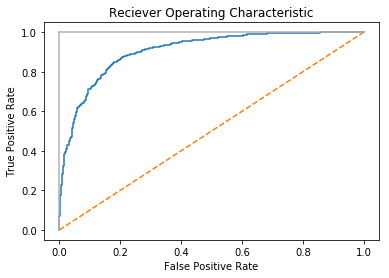

In [2]:
# load libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

# create feature matrix and target vector
features, target = make_classification(n_samples=10000,
                                       n_features=10,
                                       n_classes=2,
                                       n_informative=3,
                                       random_state=3)

# split into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=1)

# create classifier
logit = LogisticRegression()

# train model
logit.fit(features_train, target_train)

# get predicted probabilities
target_probabilities = logit.predict_proba(features_test)[:,1]

# create true and positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, target_probabilities)

# plot ROC curve
plt.title("Reciever Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1,0], c=".7"), plt.plot([1, 1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

#### Discussion
Up until now we have only examined models based on the values they predict. However, in amny leanring algorithms those predicted values are based off of probaility estimates. That is, each observation is given an explicit probability of belonging in each class. In our solution, we can use `predict_proba` to see the predicted probabilities for the first observation:

In [4]:
# get predicted probabilities
logit.predict_proba(features_test)[0:1]

array([[0.8709127, 0.1290873]])

We can see the classes using `classes_`:

In [5]:
logit.classes_

array([0, 1])

In this example, the first observation has an ~87% chance of being in the negative class (0) and a 13% chance of being in the positive class (1). By default, scikit-learn predicts an observation is part of the positive class if the probabaility is greater than 0.5 (called the *threshold*). However, instead of a middle ground, we will often want to explicitly bias our model to use a different threshold for substantive reasons. For example, if a false positive is very costly to our company, we might prefer a model that has a high probability threshold. We fail to predict some positives, but when an observation is predicted to be postivie, we can be very confident that the prediction is correct. This trade-off isrepresnted in the true positive rate (TPR) and the false positive rate (FPR).

The true positive rate is the number of observations correctly predicted true divided by all true positive observations:
$$TPR = \frac{True Positives}{True Positives+False Negatives}$$

The false positive rate is the number of incorrectly predicted positives divided by all true negative observations:
$$FPR = \frac{False Positives}{False Positives+True Negatives}$$

The ROC curve represnets the rspective TPR and FPR for every probability threshold. For example, in our solution a threshold of roughly 0.76 has a TPR of 0.63 and an FPR of 0.68 

(note from dustin: idk how to set the threshold and don't know where the indexes 116 and 45 came from in the book)

In [6]:
print("Threshold: {}".format(threshold[116]))
print("True Positive Rate: {}".format(true_positive_rate[116]))
print("False Positive Rate: {}".format(false_positive_rate[116]))

Threshold: 0.7589444399199625
True Positive Rate: 0.6308926780341023
False Positive Rate: 0.06879361914257229


However if we increase the threshold to ~89% (i.e. increase how certain the model has to be before it predicts an observation as positive) the TPR drops significantly but so does the FPR:

In [8]:
print("Threshold: {}".format(threshold[45]))
print("True Positive Rate: {}".format(true_positive_rate[45]))
print("False Positive Rate: {}".format(false_positive_rate[45]))

Threshold: 0.8918937866202341
True Positive Rate: 0.41223671013039115
False Positive Rate: 0.023928215353938187


This is because of our higher requirement for beign predicted to be in the positive class has made the model not identify a number of positive obesrvations (the lower TPR), but also reduce the noise from negative observations being predicted as positive (the lower FPR).

In addition to being able to visualize the trade-off between TPR and FPR, the ROC curve can also be used as a general metric for a model. The better a model is, the higher the curve and thus the greater the area under the curve. For this reason, it is common to calculate the area under the ROC curve (AUCROC) to judge the overall quality of a model at al possible thresholds. The closer the AUCROC is to 1, the better the model. In scikit-learn we can calculate the AUCROC using `roc_auc_score`:

In [9]:
# calculate area under curve
roc_auc_score(target_test, target_probabilities)

0.9060181541633875

#### See Also
ROC Curves in Python and R (https://community.alteryx.com/t5/Data-Science-Blog/ROC-Curves-in-Python-and-R/ba-p/138430)
The Area Under a ROC Curve (http://gim.unmc.edu/dxtests/roc3.htm)

### 11.6 Evaluating Multiclass Classifier Predictions

#### Problem
You have a model that predicts three or more classes and want to evaluate its performance.

#### Solution
Use cross-validation with an evaluation metric capable of handling more than two classes:

In [12]:
# load libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# generate features matrix and target vector
features, target = make_classification(n_samples=10000,
                                       n_features=3,
                                       n_informative=3,
                                       n_redundant=0,
                                       n_classes=3,
                                       random_state=1)

# create logistic regression
logit = LogisticRegression()

# cross-validate model using accuracy
cross_val_score(logit, features, target, scoring='accuracy')

array([0.83653269, 0.8259826 , 0.81308131])

#### Discussion
When we have balanced classes (e.g. a roughly equal number of observations in each class of a target vector), accuracy is--just like in the binary class setting--a simple and interpretable chocie for an evaluation metric. Accuracy is the number of correct predictions divided by the number of observations and works just as well in the multiclass as binary setting. However, when we have imbalanced classes (a common scenario), we should be inclined to use other evaluation metrics.

Many of scikit-learn's built-in metrics are for evaluating binary classifiers. However, many of these metrics can be extended for use when we have more than two classes. Precision, recall, and F1 scores are useful metrics that we have already covered in detial in previous recipes. While all of them were originally designed for binary classifiers, we can apply them to multiclass settings by treating our data as a set of binary classes. Doing so enables us to apply the metrics to each class as if it were the only class in the data, and then aggregate the evaluation scores for all the classes by averaging them:

In [11]:
# cross-validate model using macro averaged F1 score
cross_val_score(logit, features, target, scoring='f1_macro')

array([0.83613125, 0.82562258, 0.81293539])

In this code, `_macro` refers to the method uses to average the evaluation scores from the classes:
`macro`
* Calculate mean of metric scores for each class, weighting each class equally
`weighted`
* Calculate mean of metric scores for each class, weighting each class proportional to its size in the data
`micro`
* Calculate mean of metric scores for each observation-class combination.

### 11.7 Visualizing a Classifier's Performance
#### Problem
Given predicted classes and true classes of the test data, you want to visually compare the model's quality

#### Solution
Use a confusion matrix, which compares predicted classes and true classes:

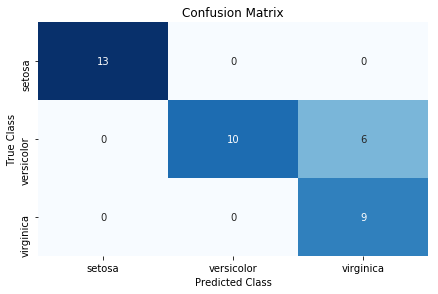

In [6]:
# load libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

# load data
iris = datasets.load_iris()

# create feature matrix
features = iris.data

# create target vector
target = iris.target

# create list of target class names
class_names = iris.target_names

# split into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=1)

# create logistic regression
classifier = LogisticRegression()

# train model and make predictions
target_predicted = classifier.fit(features_train, target_train).predict(features_test)

# create confusion matrix
matrix = confusion_matrix(target_test, target_predicted)

# create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)

# create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

#### Discussion
#### See Also
* Confusion Matrix (https://en.wikipedia.org/wiki/Confusion_matrix)
* scikit-learn documentation: Confusion Matrix (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

### 11.8 Evaluating Regression Models
#### Problem
You want to evaluate the performance of a regression model.

#### Solution
Use mean squared error (MSE):

Another common regression metric is the coefficient of determination, $R^2$

#### Discussion
#### See Also
* 
* 

### 11.9 Evaluating Clustering Models
#### Problem
#### Solution

#### Discussion
#### See Also
### 11.10 Creating a Custom Evaluation Metric
#### Problem
#### Solution

#### Discussion

#### See Also
* .

### 11.11 Visualizing the Effect of Training Set Size
#### Problem
#### Solution

#### Discussion
#### See Also

### 11.12 Creating a Text Report of Evaluation Metrics
#### Problem
#### Solution

#### Discussion
#### See Also

### 11.13 Visualizing the Effect of Hyperparameter Values
#### Problem
#### Solution

#### Discussion
#### See Also